# Flight Delay Prediction 

Importing Libraries

In [123]:
from sys import stdin
import numpy as np # linear algebra
from numpy import exp,array,random,dot
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

Load the data

In [124]:
data = pd.read_csv("FlightDelay1.csv")

print("The number of rows in the data set is {}.".format(len(data)))
print("The number of features is {}.".format(len(data.columns)))

data.head()

The number of rows in the data set is 23988.
The number of features is 12.


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE_ID,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,SCHED_DEP_TIME,SCHED_ARR_TIME,DELAY
0,2017,1,1,7,6,19805,1766,11298,12889,1055,1154,0.0
1,2017,1,1,8,7,19805,1766,11298,12889,1055,1154,0.0
2,2017,1,1,1,7,19805,1766,13930,11298,710,948,0.0
3,2017,1,1,2,1,19805,1766,13930,11298,710,948,0.0
4,2017,1,1,3,2,19805,1766,13930,11298,710,948,0.0


# Data Preprocessing:

Step1: Removing Null Values:

In [125]:
# Finding Null Values
data.isnull().sum()

YEAR                   0
QUARTER                0
MONTH                  0
DAY_OF_MONTH           0
DAY_OF_WEEK            0
AIRLINE_ID             0
FL_NUM                 0
ORIGIN_AIRPORT_ID      0
DEST_AIRPORT_ID        0
SCHED_DEP_TIME         0
SCHED_ARR_TIME         0
DELAY                462
dtype: int64

In [126]:
new_data = data.dropna(axis=0)#Delete the rows containing missing data
new_data.isnull().sum() #Check to make sure there are no more NaNs

YEAR                 0
QUARTER              0
MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
AIRLINE_ID           0
FL_NUM               0
ORIGIN_AIRPORT_ID    0
DEST_AIRPORT_ID      0
SCHED_DEP_TIME       0
SCHED_ARR_TIME       0
DELAY                0
dtype: int64

In [127]:
print("The number of rows in the new data set is {}.".format(len(new_data)))

The number of rows in the new data set is 23526.


Step 2: Picking the Top 5 Orgin & Destaination Airports in delays :

In [128]:
# Subset the flight that delayed
delay_flight=new_data[new_data.DELAY==1]

In [129]:
# Exploring the Top five origin airport delay 
Top5origin_Airport_delay=delay_flight.groupby('ORIGIN_AIRPORT_ID').DELAY.sum().nlargest(5)
print(Top5origin_Airport_delay)

ORIGIN_AIRPORT_ID
12892    395.0
14771    328.0
11298    327.0
11292    293.0
10397    278.0
Name: DELAY, dtype: float64


In [130]:
# Exploring Top five destenation airport delay 
Top5dest_Airport_delay=delay_flight.groupby('DEST_AIRPORT_ID').DELAY.sum().nlargest(5)
print(Top5dest_Airport_delay)

DEST_AIRPORT_ID
14771    339.0
12892    263.0
10397    240.0
13930    239.0
11298    195.0
Name: DELAY, dtype: float64


In [131]:
# Cleaning data keeping the Top five origin airport delay 
Top5Origin_airport=new_data.loc[new_data['ORIGIN_AIRPORT_ID'].isin(['10397', '12892', '13930','11298','14771'])] 
Top5Origin_airport.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE_ID,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,SCHED_DEP_TIME,SCHED_ARR_TIME,DELAY
0,2017,1,1,7,6,19805,1766,11298,12889,1055,1154,0.0
1,2017,1,1,8,7,19805,1766,11298,12889,1055,1154,0.0
2,2017,1,1,1,7,19805,1766,13930,11298,710,948,0.0
3,2017,1,1,2,1,19805,1766,13930,11298,710,948,0.0
4,2017,1,1,3,2,19805,1766,13930,11298,710,948,0.0


In [132]:
# Cleaning data keeping the Top five dest airport delay 
clean_data=Top5Origin_airport.loc[new_data['DEST_AIRPORT_ID'].isin(['10397', '12892', '13930','11292','14771'])] 
clean_data.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE_ID,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,SCHED_DEP_TIME,SCHED_ARR_TIME,DELAY
358,2017,1,1,9,1,19805,1776,11298,11292,910,1018,1.0
359,2017,1,1,10,2,19805,1776,11298,11292,910,1018,0.0
360,2017,1,1,11,3,19805,1776,11298,11292,910,1018,0.0
361,2017,1,1,12,4,19805,1776,11298,11292,910,1018,0.0
362,2017,1,1,13,5,19805,1776,11298,11292,910,1018,0.0


Step 3: Converting all categorical variables into dummy variables:

In [133]:
dummy_data = pd.get_dummies(clean_data, columns=['AIRLINE_ID', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID'], drop_first=True)
dummy_data.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,SCHED_DEP_TIME,SCHED_ARR_TIME,DELAY,AIRLINE_ID_19790,...,AIRLINE_ID_20304,AIRLINE_ID_21171,ORIGIN_AIRPORT_ID_11298,ORIGIN_AIRPORT_ID_12892,ORIGIN_AIRPORT_ID_13930,ORIGIN_AIRPORT_ID_14771,DEST_AIRPORT_ID_11292,DEST_AIRPORT_ID_12892,DEST_AIRPORT_ID_13930,DEST_AIRPORT_ID_14771
358,2017,1,1,9,1,1776,910,1018,1.0,0,...,0,0,1,0,0,0,1,0,0,0
359,2017,1,1,10,2,1776,910,1018,0.0,0,...,0,0,1,0,0,0,1,0,0,0
360,2017,1,1,11,3,1776,910,1018,0.0,0,...,0,0,1,0,0,0,1,0,0,0
361,2017,1,1,12,4,1776,910,1018,0.0,0,...,0,0,1,0,0,0,1,0,0,0
362,2017,1,1,13,5,1776,910,1018,0.0,0,...,0,0,1,0,0,0,1,0,0,0


In [134]:
data_final_vars=dummy_data.columns.values.tolist()
y=['DELAY']
X=[i for i in data_final_vars if i not in y]

# Explority Data Analysis:

In [135]:
clean_data['DELAY'].value_counts()

0.0    930
1.0    255
Name: DELAY, dtype: int64

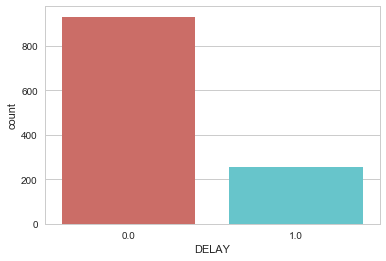

In [136]:
sns.countplot(x='DELAY',data=clean_data, palette='hls')
plt.show()
plt.savefig('count_plot')

There are 18352 no's and 5174 yes's in the outcome variables.
Let's get a sense of the numbers across the two classes

In [137]:
clean_data.groupby('DELAY').mean()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE_ID,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,SCHED_DEP_TIME,SCHED_ARR_TIME
DELAY,,,,,,,,,,,
0.0,2017.0,2.520430,7.150538,14.284946,4.251613,20577.072043,1817.549462,13288.704301,13087.759140,1347.805376,1499.276344
1.0,2017.0,2.247059,6.176471,14.705882,4.062745,20448.337255,1894.917647,13249.039216,13079.031373,1469.400000,1650.219608


# Visualizations

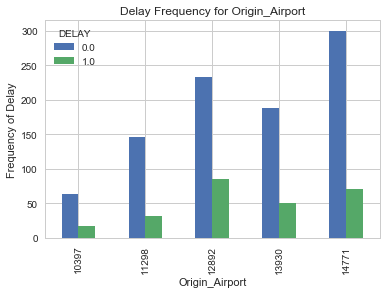

In [138]:
%matplotlib inline
pd.crosstab(clean_data.ORIGIN_AIRPORT_ID,clean_data.DELAY).plot(kind='bar')
plt.title('Delay Frequency for Origin_Airport')
plt.xlabel('Origin_Airport')
plt.ylabel('Frequency of Delay')
plt.savefig('Delay_fre_Origin_Airport')

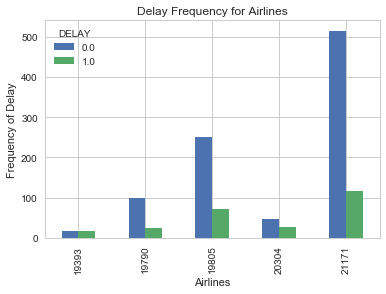

In [139]:
%matplotlib inline
pd.crosstab(clean_data.AIRLINE_ID,clean_data.DELAY).plot(kind='bar')
plt.title('Delay Frequency for Airlines')
plt.xlabel('Airlines')
plt.ylabel('Frequency of Delay')
plt.savefig('Delay_fre_Airlines')

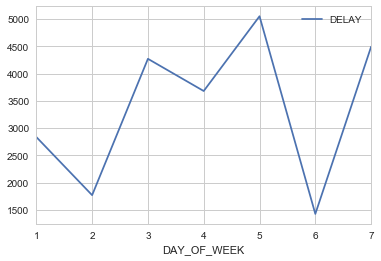

In [140]:
data[['DAY_OF_WEEK','DELAY']].groupby(['DAY_OF_WEEK']).count().plot()
plt.show()

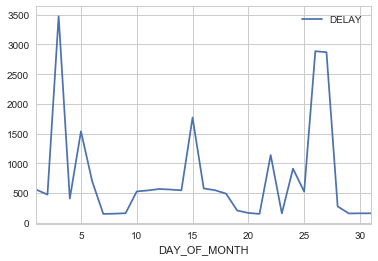

In [141]:
data[['DAY_OF_MONTH','DELAY']].groupby(['DAY_OF_MONTH']).count().plot()
plt.show()

In [142]:
#Read the Airline Code Description CSV file for full names of the Airlines
Airline_key = pd.read_csv('Airlines.csv')
Airline_key.head()

,Code,Description
0,19031,Mackey International Inc.: MAC
1,19032,Munz Northern Airlines Inc.: XY
2,19033,Cochise Airlines Inc.: COC
3,19034,Golden Gate Airlines Inc.: GSA
4,19035,Aeromech Inc.: RZZ


In [143]:
Airline_key.rename(columns={'Code': 'AIRLINE_ID'}, inplace=True)
Airline_key.head()

,AIRLINE_ID,Description
0,19031,Mackey International Inc.: MAC
1,19032,Munz Northern Airlines Inc.: XY
2,19033,Cochise Airlines Inc.: COC
3,19034,Golden Gate Airlines Inc.: GSA
4,19035,Aeromech Inc.: RZZ


In [144]:
merged = pd.merge (clean_data, Airline_key, on ='AIRLINE_ID', how = 'inner')
merged.set_index ('AIRLINE_ID', inplace=True)
merged.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,SCHED_DEP_TIME,SCHED_ARR_TIME,DELAY,Description
AIRLINE_ID,,,,,,,,,,,,
19805,2017,1,1,9,1,1776,11298,11292,910,1018,1.0,American Airlines Inc.: AA
19805,2017,1,1,10,2,1776,11298,11292,910,1018,0.0,American Airlines Inc.: AA
19805,2017,1,1,11,3,1776,11298,11292,910,1018,0.0,American Airlines Inc.: AA
19805,2017,1,1,12,4,1776,11298,11292,910,1018,0.0,American Airlines Inc.: AA
19805,2017,1,1,13,5,1776,11298,11292,910,1018,0.0,American Airlines Inc.: AA


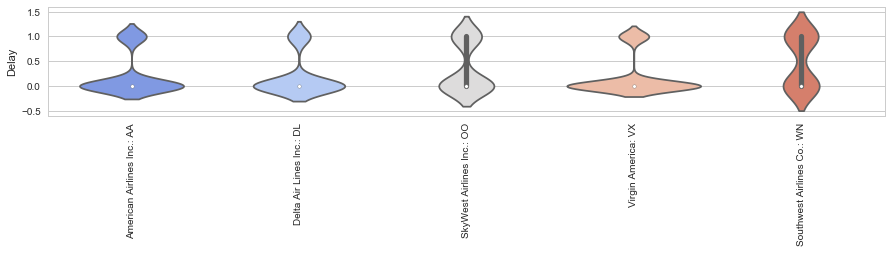

In [145]:
plt.figure(figsize=(15, 2))
g = sns.violinplot(x="Description", y="DELAY", data=merged,palette="coolwarm")
g.set_ylabel('Delay')
g.set_xlabel('')
label = g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

# Feature Selection

In [146]:
dummy_data.columns.values

array(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_NUM',
       'SCHED_DEP_TIME', 'SCHED_ARR_TIME', 'DELAY', 'AIRLINE_ID_19790',
       'AIRLINE_ID_19805', 'AIRLINE_ID_20304', 'AIRLINE_ID_21171',
       'ORIGIN_AIRPORT_ID_11298', 'ORIGIN_AIRPORT_ID_12892',
       'ORIGIN_AIRPORT_ID_13930', 'ORIGIN_AIRPORT_ID_14771',
       'DEST_AIRPORT_ID_11292', 'DEST_AIRPORT_ID_12892',
       'DEST_AIRPORT_ID_13930', 'DEST_AIRPORT_ID_14771'], dtype=object)

In [147]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 18)
rfe = rfe.fit(dummy_data[X], dummy_data[y] )
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True False False  True  True  True  True  True
  True  True  True  True  True  True  True  True]
[1 1 1 1 1 3 2 1 1 1 1 1 1 1 1 1 1 1 1 1]


/Users/Manar/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Recursive Feature Elimination (RFE) has helped us select the following features:

In [148]:
cols=["YEAR", "QUARTER", "MONTH", "DAY_OF_MONTH", "DAY_OF_WEEK", "SCHED_ARR_TIME", "AIRLINE_ID_19790", 
      "AIRLINE_ID_19805", "AIRLINE_ID_20304", "AIRLINE_ID_21171", "ORIGIN_AIRPORT_ID_11298", "ORIGIN_AIRPORT_ID_12892",
      "ORIGIN_AIRPORT_ID_13930",
      "ORIGIN_AIRPORT_ID_14771", "DEST_AIRPORT_ID_11292", 
      "DEST_AIRPORT_ID_12892", "DEST_AIRPORT_ID_13930", "DEST_AIRPORT_ID_14771"] 
x =dummy_data[cols]
y =dummy_data['DELAY']

In [149]:
import statsmodels.api as sm

logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.478164
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  DELAY   No. Observations:                 1185
Model:                          Logit   Df Residuals:                     1167
Method:                           MLE   Df Model:                           17
Date:                Sun, 18 Mar 2018   Pseudo R-squ.:                 0.08178
Time:                        22:06:16   Log-Likelihood:                -566.62
converged:                       True   LL-Null:                       -617.09
                                        LLR p-value:                 5.973e-14
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
YEAR                       -0.0001      0.000     -0.287      0.774      -0.001   

# Spilliting the data into training and testing :

In [150]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(829, 18)
(356, 18)
(829,)
(356,)


# Logistic Regression:

Building the Model:

In [151]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Cross Validation:

In [152]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, x_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.773


Testing the Model:

In [153]:
y_pred = logreg.predict(x_test)

Summary of the predictions made by the classifier:

In [154]:
# Confusion Matrix:
print("The Confusing Matrix:")
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

The Confusing Matrix:
[[282   5]
 [ 64   5]]


In [155]:
# Accuracy Score:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.81


In [156]:
# Classification Report:
print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1']))

             precision    recall  f1-score   support

    class 0       0.82      0.98      0.89       287
    class 1       0.50      0.07      0.13        69

avg / total       0.75      0.81      0.74       356



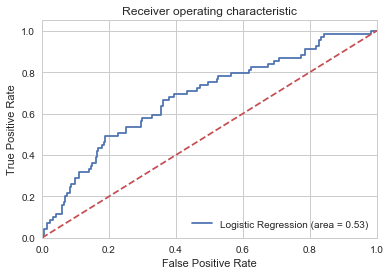

In [157]:
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Artificial Neural Network:

Building the Model:

In [158]:
class NeuralNetwork():
    def __init__(self):
        # seed the random number generator, so it generates the same 
        random.seed(1)
        
        # We Model a single neuron, with 18 input and one output connection
        self.synaptic_weights = 2 * random.random((18,1)) -1
        
    # The sigmod function, which take the wieghted sum and normalized it between 0 and 1    
    def __sigmoid(self,x):
        return 1/(1 + exp(-x))
    
    # The dervative of the sigmoid function, it indicates how confident we are about the wieght
    def __sigmoid_derivative(self,x):
        return x*(1-x)
    
    # we train the neural network through a process of trail and error.
    # Adjasting the synaptic weights each time.
    def train(self,training_set_inputs, training_set_outputs,number_of_training_iterations):
        for iteration in range(number_of_training_iterations):
            #Pass the training set through our neural network (a single neuran).
            output = self.think(training_set_inputs)
     
            #Calculate the error (The diffrence between the desired output and the predicted output )
            error = training_set_outputs - output
           
            # Multiply the error by the input and again by the gradient of the Sigmoid curve.
            # This means less Confident weight are adjusted more.
            # This means inputs,which are zero, do not cause changes to the weights.
            Adjustment = dot(training_set_inputs.T, error * self.__sigmoid_derivative(output))
            
            #Adjust the weights.
            self.synaptic_weights += Adjustment
            
    #The neural network thinks.
    def think(self,inputs):
        # Pass inputs through our neural network (our single neuron).
        return self.__sigmoid(dot(inputs, self.synaptic_weights))
            
            
if __name__ == "__main__":
    
    #I ntialise a single neuron neural network.
    neural_network = NeuralNetwork()
    
    print("Random starting synaptic weights: ")
    print(neural_network.synaptic_weights)

Random starting synaptic weights: 
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]
 [-0.39533485]
 [-0.70648822]
 [-0.81532281]
 [-0.62747958]
 [-0.30887855]
 [-0.20646505]
 [ 0.07763347]
 [-0.16161097]
 [ 0.370439  ]
 [-0.5910955 ]
 [ 0.75623487]
 [-0.94522481]
 [ 0.34093502]
 [-0.1653904 ]
 [ 0.11737966]]


Train the Model:

In [159]:
    training_set_inputs = x_train.values.reshape(-1,18)
    training_set_outputs = y_train.values.reshape(-1,1)

   
    # Train the neural network using a training set
    # Do it 10,000 time and make small adjusments each time.
    neural_network.train(training_set_inputs, training_set_outputs, 10000)
    print("New synaptic wieghts after training:")
    print(neural_network.synaptic_weights)

/Users/Manar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


New synaptic wieghts after training:
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]
 [-0.39533485]
 [-0.70648822]
 [-0.81532281]
 [-0.62747958]
 [-0.30887855]
 [-0.20646505]
 [ 0.07763347]
 [-0.16161097]
 [ 0.370439  ]
 [-0.5910955 ]
 [ 0.75623487]
 [-0.94522481]
 [ 0.34093502]
 [-0.1653904 ]
 [ 0.11737966]]


Cross Validation:

In [160]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = neural_network.train(training_set_inputs, training_set_outputs, 10000)
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, x_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

/Users/Manar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


TypeError: estimator should be an estimator implementing 'fit' method, None was passed

Testing the Model:

In [ ]:
# Test the neural network with a new set
y_pred = neural_network.think(x_test)

Summary of the predictions made by the classifier:

In [ ]:
from sklearn.metrics import confusion_matrix
# Confusion Matrix:
print("The Confusing Matrix:")
print(confusion_matrix(y_test, y_pred))

In [ ]:
# Accuracy score
print('The accuracy of ANN in the testing set is',accuracy_score(y_pred,y_test))

In [ ]:
# Classfication Report:
print(classification_report(y_test, y_pred,target_names=['class 0', 'Class 1']))     

ROC:

In [ ]:
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


ANN_roc_auc = roc_auc_score(y_test, neural_network.think(x_test))
fpr, tpr, thresholds = roc_curve(y_test,neural_network.think(x_test))
plt.figure()
plt.plot(fpr, tpr, label='ANN  (area = %0.2f)' % ANN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ANN_ROC')
plt.show()

# K-Nearest Neighbour 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(x_train, y_train)

Cross Validation:

In [ ]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = KNeighborsClassifier(n_neighbors=8)
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, x_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

Testing the Model:

In [ ]:
y_pred = classifier.predict(x_test)

 Summary of the predictions made by the classifier:

In [ ]:
from sklearn.metrics import confusion_matrix
# Confusion Matrix:
print("The Confusing Matrix:")
print(confusion_matrix(y_test, y_pred))

In [ ]:
# Accuracy score
print('The accuracy of K-Nearest in the testing set is',accuracy_score(y_pred,y_test))

In [ ]:
# Classfication Report:
print(classification_report(y_test, y_pred,target_names=['class 0', 'Class 1']))

ROC:

In [ ]:
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


KNN_roc_auc = roc_auc_score(y_test, classifier.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN  (area = %0.2f)' % KNN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

# RANDOM FOREST CLASSIFIER

Building the Model:

In [161]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 1000, criterion='gini', min_samples_leaf = 50, max_features='auto', oob_score=True, n_jobs=-1, random_state=50)
calssifier = classifier.fit(x_train,y_train)

Cross Validation:

In [162]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = calssifier
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, x_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.776


Testing the Model:

In [163]:
predictions = calssifier.predict(x_test)

Summary of the predictions made by the classifier:

In [164]:
from sklearn.metrics import confusion_matrix
# Confusion Matrix:
print("The Confusing Matrix:")
print(confusion_matrix(y_test,predictions ))

The Confusing Matrix:
[[287   0]
 [ 69   0]]


In [165]:
# Accuracy score
print('The accuracy of Random Forest in the testing set is',accuracy_score(predictions,y_test))

The accuracy of Random Forest in the testing set is 0.806179775281


In [166]:
# Classfication Report:
print(classification_report(y_test, predictions,target_names=['class 0', 'Class 1']))

             precision    recall  f1-score   support

    class 0       0.81      1.00      0.89       287
    Class 1       0.00      0.00      0.00        69

avg / total       0.65      0.81      0.72       356



/Users/Manar/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ROC:

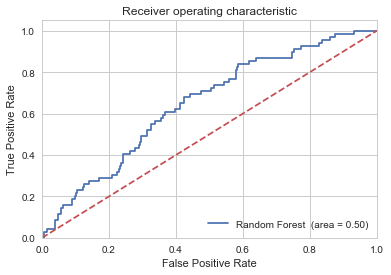

In [167]:
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


KNN_roc_auc = roc_auc_score(y_test, classifier.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest  (area = %0.2f)' % KNN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

In [168]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(pred_train,tar_train)
print(model.feature_importances_)

NameError: name 'pred_train' is not defined